First we will load a 100 images to test the preprocessing speed

In [7]:
import cv2 as cv
import matplotlib.pyplot as plt
import skimage
import glob 
import os 
import random
import numpy as np
import pandas as pd
from PIL import ImageFile
from sklearn.model_selection import train_test_split

ImageFile.LOAD_TRUNCATED_IMAGES = True



In [8]:
import numpy as np
import pandas as pd
from tensorflow.keras import layers, Sequential, models
from keras.utils import to_categorical
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping
from keras.applications import efficientnet, vgg16

In [9]:
def preprocess_image(image):
    resized = cv.resize(image,(300,300),interpolation = cv.INTER_AREA)
    img = cv.medianBlur(resized,5)
    ret,th1 = cv.threshold(img,127,255,cv.THRESH_BINARY)
    th2 = cv.adaptiveThreshold(img,255,cv.ADAPTIVE_THRESH_MEAN_C,\
            cv.THRESH_BINARY,11,2)
    th3 = cv.adaptiveThreshold(img,255,cv.ADAPTIVE_THRESH_GAUSSIAN_C,\
            cv.THRESH_BINARY,15,2)
    images = [th1, th2, th3, img]

    
    return images
    

In [10]:
# def preprocess_image(image,reshape_size):
#     if image.shape == (570, 1015):
#         cropped = image[250:-100,100:]
#         resized = cv.resize(cropped,(reshape_size,reshape_size),interpolation = cv.INTER_AREA)
#         edges = cv.Canny(resized,50,50)
#         gaussian = cv.adaptiveThreshold(resized,255,cv.ADAPTIVE_THRESH_GAUSSIAN_C,\
#             cv.THRESH_BINARY,13,3)
#         (T, thresh1) = cv.threshold(resized, 0.4, 0.6,
#                             cv.THRESH_BINARY_INV)
#         (T, thresh) = cv.threshold(resized, 0.6, 0.9, cv.THRESH_BINARY)
#         images = [edges,gaussian,thresh1,thresh]
#         return images
    
#     elif image.shape == (582, 1034):
#         cropped = image[60:500,:]
#         resized = cv.resize(cropped,(reshape_size,reshape_size),interpolation = cv.INTER_AREA)
#         edges = cv.Canny(resized,50,50)
#         gaussian = cv.adaptiveThreshold(resized,255,cv.ADAPTIVE_THRESH_GAUSSIAN_C,\
#             cv.THRESH_BINARY,13,3)
#         (T, thresh1) = cv.threshold( resized, 0.4, 0.6,
#                             cv.THRESH_BINARY_INV)
#         (T, thresh) = cv.threshold(resized, 0.6, 0.9, cv.THRESH_BINARY)
#         images = [edges,gaussian,thresh1,thresh]
#         return images
    
#     elif image.shape == (624, 1200):
#         cropped = image[150:,:]
#         resized = cv.resize(cropped,(reshape_size,reshape_size),interpolation = cv.INTER_AREA)
#         edges = cv.Canny(resized,100,100)
#         gaussian = cv.adaptiveThreshold(resized,255,cv.ADAPTIVE_THRESH_GAUSSIAN_C,\
#             cv.THRESH_BINARY,11,3)
#         (T, thresh1) = cv.threshold( resized, 0.4, 0.6,
#                             cv.THRESH_BINARY_INV)
#         (T, thresh) = cv.threshold(resized, 0.6, 0.9, cv.THRESH_BINARY)
#         images = [edges,gaussian,thresh1,thresh]
#         return images
    
#     elif image.shape == (624, 1110):
#         cropped = image[350:-170,:]
#         resized = cv.resize(cropped,(reshape_size,reshape_size),interpolation = cv.INTER_AREA)
#         edges = cv.Canny(resized,50,250)
#         gaussian = cv.adaptiveThreshold(resized,255,cv.ADAPTIVE_THRESH_GAUSSIAN_C,\
#             cv.THRESH_BINARY,9,5)
#         (T, thresh1) = cv.threshold( resized, 0.4, 0.6,
#                             cv.THRESH_BINARY_INV)
#         (T, thresh) = cv.threshold(resized, 0.6, 0.9, cv.THRESH_BINARY)
#         images = [edges,gaussian,thresh1,thresh]
    
#         return images

In [13]:
X = []
y = []
idx = 0


for root , dirs , files in os.walk("raw_data"):
    if dirs:
        parent = root
        folders = dirs
        print(folders)

    if files:
        print(f"Preprocessing folder {folders[idx]}...")
        for file in np.random.choice(np.array(files),len(files), replace = False):
            try:
                original_image = cv.imread(os.path.join(parent , folders[idx], file),0)
                processed_image = preprocess_image(original_image)
                X.append(processed_image)
                y.append(idx)
                #dimensions checking
                print(idx)
            
            except Exception as e:
                print("Detected bad image!")
                continue
        
        idx += 1
        
X = np.array(X)
y = np.array(y)
X.shape , y.shape




    
    

['Flat', 'Chaotic', 'Good']
Preprocessing folder Flat...
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
Detected bad image!
0
0
Preprocessing folder Chaotic...
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
Detected bad image!
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
Preprocessing folder Good...
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
Detected bad image!
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2


((524, 4, 300, 300), (524,))

In [ ]:
X.shape

(524,)

In [ ]:
# from tensorflow.keras.preprocessing.image import ImageDataGenerator

# datagen = ImageDataGenerator(
#     featurewise_center = False,
#     featurewise_std_normalization = False,
#     rotation_range = 10,
#     width_shift_range = 0.1,
#     height_shift_range = 0.1,
#     horizontal_flip = True,
#     zoom_range = (0.8, 1.2),
#     ) 

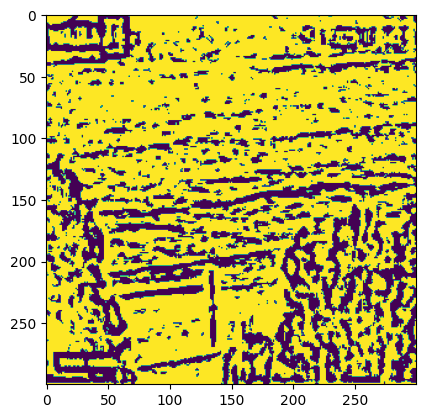

In [14]:
plt.imshow(X[1][1])

In [15]:
# INPUT_SHAPE = (4, 250, 250)
NUMBER_CLASSES = 3

In [ ]:
X.shape

(524, 4, 300, 300)

In [16]:
X= X/255

In [17]:
X.shape
y_cat = to_categorical(y)

array([[1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       ...,
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.]], dtype=float32)

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y_cat, test_size=0.30)

In [19]:
def initialize_basic():
    model = models.Sequential()
    
    model.add(layers.Conv2D(64, (3,3), input_shape= (4,300,300), padding='same', activation="relu"))
    
    model.add(layers.MaxPool2D(pool_size=(2,2)))

    model.add(layers.Conv2D(32, (2,2), activation="relu")) 
    model.add(layers.Flatten())
    model.add(layers.Dense(128, activation = "relu"))
    model.add(layers.Dropout(0.3))
    model.add(layers.Dense(3, activation = "softmax"))
    return model


In [20]:
def compile_model(model, learning_rate=1e-4):
    model.compile(loss = "categorical_crossentropy",
                            optimizer = Adam(learning_rate=learning_rate),
                            metrics = ["accuracy"])
    return model

In [21]:
test_model = initialize_basic()

In [22]:
compile_model(test_model)


In [23]:
es = EarlyStopping(patience = 3,restore_best_weights= True)
test_model.fit(X_train , y_train ,callbacks = [es] ,validation_split = 0.2, epochs = 64, batch_size = 64)

Epoch 1/64


2022-11-29 17:09:59.953489: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


5/5 [==============================] - 2s 325ms/step - loss: 1.2803 - accuracy: 0.3459 - val_loss: 1.0741 - val_accuracy: 0.4595
Epoch 2/64
5/5 [==============================] - 1s 262ms/step - loss: 1.0397 - accuracy: 0.4623 - val_loss: 1.1157 - val_accuracy: 0.4459
Epoch 3/64
5/5 [==============================] - 1s 264ms/step - loss: 0.9766 - accuracy: 0.5514 - val_loss: 0.9829 - val_accuracy: 0.5811
Epoch 4/64
5/5 [==============================] - 1s 266ms/step - loss: 0.9133 - accuracy: 0.5856 - val_loss: 0.9536 - val_accuracy: 0.5946
Epoch 5/64
5/5 [==============================] - 1s 268ms/step - loss: 0.8423 - accuracy: 0.6541 - val_loss: 0.9056 - val_accuracy: 0.6216
Epoch 6/64
5/5 [==============================] - 1s 264ms/step - loss: 0.7822 - accuracy: 0.6952 - val_loss: 0.9010 - val_accuracy: 0.6622
Epoch 7/64
5/5 [==============================] - 1s 260ms/step - loss: 0.6891 - accuracy: 0.7363 - val_loss: 0.8265 - val_accuracy: 0.6081
Epoch 8/64
5/5 [===============

In [24]:
test_model.evaluate(X_test,y_test)

5/5 [==============================] - 0s 50ms/step - loss: 0.8270 - accuracy: 0.6392


[0.8269590735435486, 0.6392405033111572]

In [ ]:
# def initialize_model(X):
    
#     model = models.Sequential()
    
#     model.add(layers.Conv2D(16, (4, 4), activation = 'relu', padding = 'same', input_shape=(4,300,300)))
#     model.add(layers.MaxPooling2D((2, 2)))
#     model.add(layers.Dropout(0.2))

#     model.add(layers.Conv2D(32, (3, 3), activation = 'relu', padding = 'same'))
#     model.add(layers.MaxPooling2D((2, 2)))

#     model.add(layers.Dropout(0.2))
  
#     model.add(layers.Conv2D(64, (2, 2), activation = 'relu', padding = 'same'))
#     model.add(layers.Dropout(0.3))
#     model.add(layers.MaxPooling2D((2, 2)))

#     model.add(layers.Flatten())
#     model.add(layers.Dense(100, activation = 'relu'))
#     model.add(layers.Dropout(0.4))
#     model.add(layers.Dense(3, activation = 'softmax'))
    
#     return model

# def compile_model(model  , learning_rate=1e-4):
#     model.compile( loss = "categorical_crossentropy",
#                             optimizer = Adam(learning_rate=learning_rate),
#                             metrics = ["accuracy"])
#     return model


# model = initialize_model(X)
# model = compile_model(model)


# from keras.utils import to_categorical
# from keras.callbacks import EarlyStopping 

# es = EarlyStopping(patience = 3 ,restore_best_weights=True)


# model.fit(X , y_cat , epochs = 5 , batch_size = 256 , callbacks = [es])

ValueError: Exception encountered when calling layer "max_pooling2d_2" (type MaxPooling2D).

Negative dimension size caused by subtracting 2 from 1 for '{{node max_pooling2d_2/MaxPool}} = MaxPool[T=DT_FLOAT, data_format="NHWC", explicit_paddings=[], ksize=[1, 2, 2, 1], padding="VALID", strides=[1, 2, 2, 1]](Placeholder)' with input shapes: [?,1,75,64].

Call arguments received by layer "max_pooling2d_2" (type MaxPooling2D):
  • inputs=tf.Tensor(shape=(None, 1, 75, 64), dtype=float32)

In [26]:
test_image  = cv.imread("test_images/test_2.png",0)


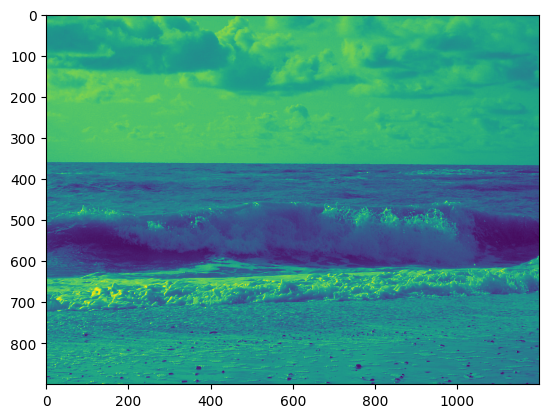

In [27]:
plt.imshow(test_image)

In [28]:
X.shape

(524, 4, 300, 300)

In [29]:
test_image.shape

(900, 1200)

(4, 300, 300)

In [30]:
test_image = preprocess_image(test_image)


In [31]:
test_image = np.array([(test_image)])

In [32]:
test_image = test_image/255

In [ ]:
test_image.shape

(1, 4, 300, 300)

TypeError: Invalid shape (1246,) for image data

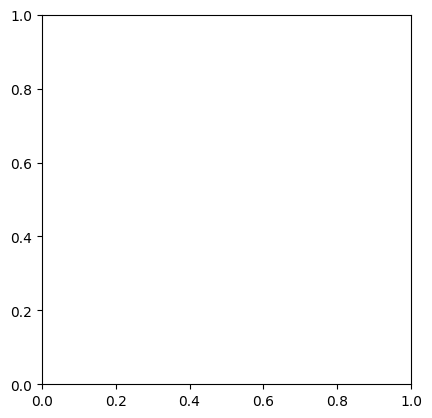

In [ ]:
plt.imshow(test_image[1])

5/5 [==============================] - 0s 52ms/step


array([[0.5218316 , 0.17378914, 0.30437925],
       [0.4645324 , 0.1106846 , 0.42478296],
       [0.25420862, 0.10493058, 0.6408608 ],
       [0.31928548, 0.11867049, 0.5620441 ],
       [0.00868562, 0.7323963 , 0.25891805],
       [0.42399463, 0.09960178, 0.47640353],
       [0.24283488, 0.5248582 , 0.23230691],
       [0.15828368, 0.46926504, 0.37245128],
       [0.02620858, 0.7008013 , 0.2729901 ],
       [0.07928926, 0.5611287 , 0.35958207],
       [0.23592986, 0.169918  , 0.5941521 ],
       [0.57735956, 0.05423116, 0.36840922],
       [0.69677395, 0.06661906, 0.23660699],
       [0.12660979, 0.22579525, 0.647595  ],
       [0.02169306, 0.8319253 , 0.14638166],
       [0.32600203, 0.10605792, 0.56794006],
       [0.0077272 , 0.893941  , 0.09833182],
       [0.00916732, 0.9417751 , 0.04905768],
       [0.02482678, 0.929535  , 0.04563824],
       [0.3252334 , 0.25569093, 0.4190756 ],
       [0.01965818, 0.65652984, 0.32381198],
       [0.56490546, 0.04921552, 0.38587898],
       [0.

In [33]:
test_model.predict(test_image)

1/1 [==============================] - 0s 53ms/step


array([[0.50997573, 0.06074681, 0.42927754]], dtype=float32)